In [5]:
import sys
assert sys.version_info >= (3,7)

In [6]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [7]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# GET THE DATA

def load_housing_data():
    # Define the path to the local CSV file
    csv_path = Path("datasets/housing/housing.csv")

    # If the CSV file already exists locally, load and return it
    if csv_path.is_file():
        return pd.read_csv(csv_path)

    # Define the path to the compressed tarball file
    tarball_path = Path("datasets/housing.tgz")

    # If the tarball doesn't exist, download and extract it
    if not tarball_path.is_file():
        # Create the datasets directory if it doesn't exist
        Path("datasets").mkdir(parents=True, exist_ok=True)

        # URL of the dataset to download
        url = "https://github.com/ageron/data/raw/main/housing.tgz"

        # Download the tarball from the URL
        urllib.request.urlretrieve(url, tarball_path)

        # Open and extract the tarball into the datasets directory
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path='datasets')

        # Load the extracted CSV file into a DataFrame
        return pd.read_csv(Path("datasets/housing/housing.csv"))

# Load the housing data into a pandas DataFrame
housing = load_housing_data()


In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
# Define the directory where figures will be saved
IMAGES_PATH = Path() / "images" / "end_to_end_project"

# Create the directory (and any parent directories) if it doesn't already exist
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Build the full file path (e.g., images/end_to_end_project/my_plot.png)
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"

    # Optionally adjust the layout before saving
    if tight_layout:
        plt.tight_layout()

    # Save the figure to the specified path with the given format and resolution
    plt.savefig(path, format=fig_extension, dpi=resolution)

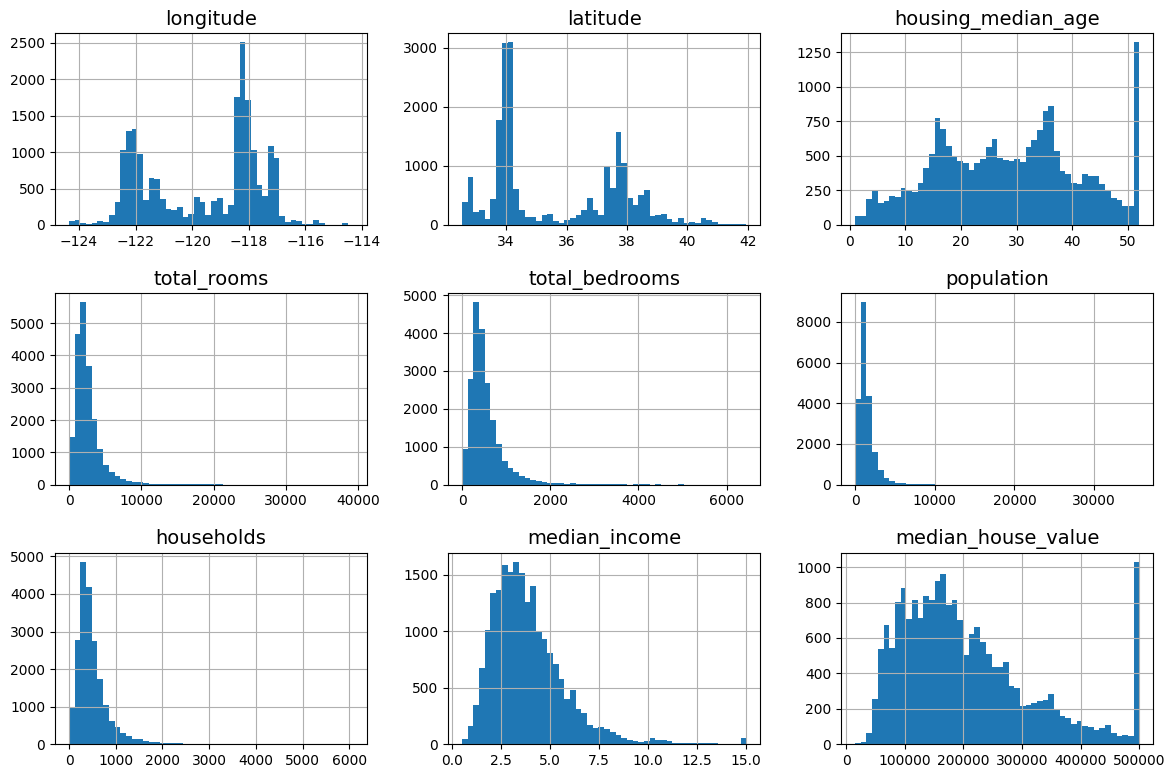

In [13]:
import matplotlib.pyplot as plt

# histogram configuration
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# plot histogram
housing.hist(bins=50, figsize=(12,8))
save_fig("attributes_hisrogram_plots")
plt.show()

In [14]:
# CREATE A TEST SET

import numpy as np

def shuffle_and_split_data(data, test_ratio):
    # Generate a random permutation of all row indices
    shuffled_indices = np.random.permutation(len(data))
    # Determine how many samples should go into the test set
    test_set_size = int(len(data) * test_ratio)
    # Select the first 'test_set_size' indices for the test set
    test_indices = shuffled_indices[:test_set_size]
    # Use the remaining indices for the training set
    train_indices = shuffled_indices[test_set_size:]
    # Return the corresponding subsets of the DataFrame
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(f"len(train_set): {len(train_set)} | len(test_set): {len(test_set)}")

len(train_set): 16512 | len(test_set): 4128


In [16]:
# To get the same split everytime we run the notebook we need to set a random seed:
np.random.seed(42)

In [17]:
from zlib import crc32

# To ensure that the test set remains the same across multiple runs and dataset updates
# we use a hash function on the identifier

# split data based on id column hash value
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier) < test_ratio * 2**32)

# split data with id hash
def split_data_with_id_hash(data, test_ratio, id_column):
    # extract ids
    ids = data[id_column]
    # check if each id is in the test set
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    # return train and test sets
    return data.loc[~in_test_set], data.loc[in_test_set]

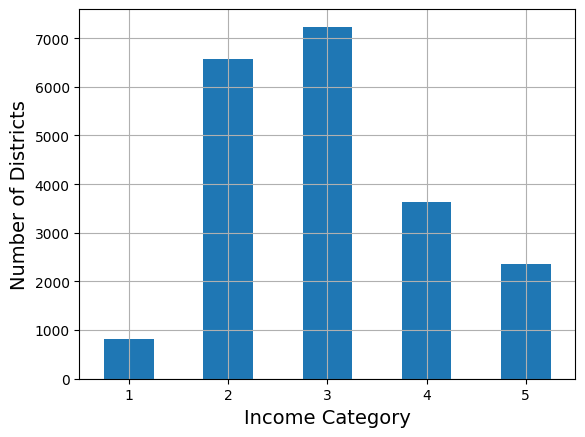

In [18]:
# Suppose that the you've been told that the median income is an important
# attribute to predict the house prices. Since the median income is a continuous
# numerical attribute, we need to create an income category attribute considering
# to have a sufficient number of instances in each category.

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [19]:
# Stratified split

from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplit creates multiple random splits of the data but ensures that the
# proportion of the different categories of a certain attribute is preserved in both
# the training and testing sets. In this case, we want to stratify based on the
# income category attribute we just created.


# It's a good practice to have multuple splits to better estimate the performance of
# the model

splitter = StratifiedShuffleSplit(
    n_splits=10,    # number splits to generate
    test_size=0.2,  # proportion of the dataset to include in the test split
    random_state=42 # controls the randomness of the split
    )

strat_splits = []
# for each split, get the train and test sets
# the split function takes both the data and the stratification attribute
# because we want to stratify based on income category
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    # the iloc function is used to select rows by integer-location based indexing (deprecated)
    # considering that the split function returns NumPy arrays of indices, they will contain
    # all the indices of the training and testing sets respectively
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

# let's take the first stratified split
strat_train_set, strat_test_set = strat_splits[0]


In [20]:
# If we're looking for a single stratified split there's a shorter way

from sklearn.model_selection import train_test_split


strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

# Let's see if it worked as expected calculating the proportion (percentage) of every category
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

# Now we want to compare it with the percentage of the categories in the start dataset
print(housing["income_cat"].value_counts() / len(housing))

# From the results we can see that the stratified split worked as expected

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64


In [21]:
# we don't need the income_cat column anymore, so we can drop it
# this for loop iterate on both the sets starting from strat_train_set
for set_ in (strat_train_set, strat_test_set):
    # axis=1 indicate that you want to drop a column and not a row (axis=0)
    # inplace=True makes you drop directly from the source dataframe instead of creating a copy
    set_.drop("income_cat", axis=1, inplace=True)

### Explore and visualize the data to get insight 

In [22]:
# saving a copy to revert
housing = strat_train_set.copy()

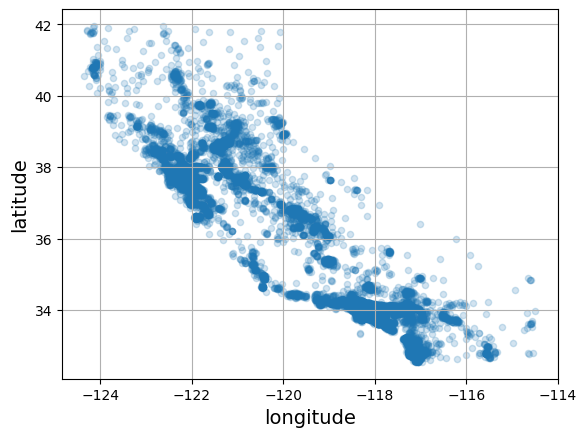

In [23]:
#considering that the data contain geographical information (lat, lon) let's create a scatterplot:

# the alpha value controls the trasparency of the point to give an idea of
# density. It's a value between 0-1
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

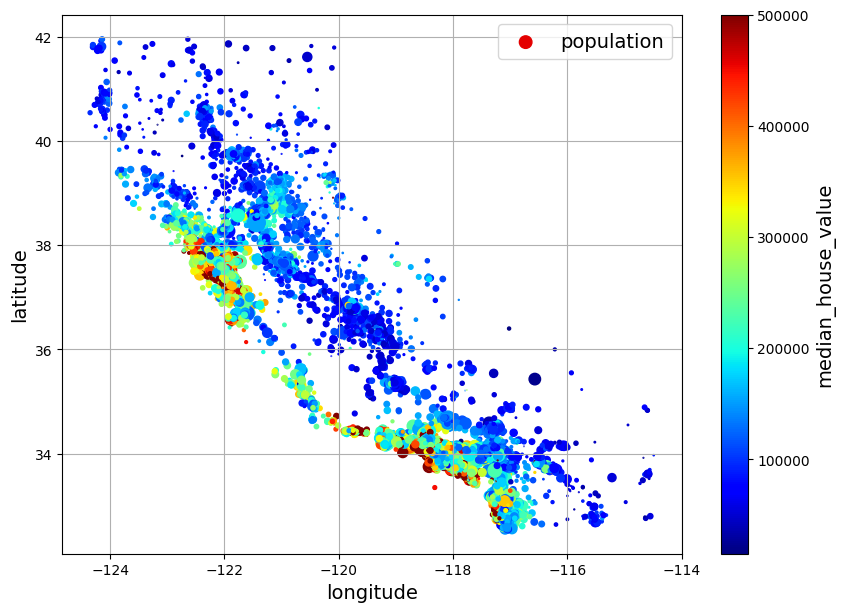

In [24]:
housing.plot(
    kind="scatter",          # Type of plot: scatter plot
    x="longitude",           # Column for the x-axis
    y="latitude",            # Column for the y-axis
    grid=True,               # Show grid lines
    s=housing["population"] / 100,  # Marker size proportional to population
    label="population",      # Label for the legend
    c="median_house_value",  # Marker color based on median house value
    cmap="jet",              # Color map used to represent values
    colorbar=True,           # Display color bar for the color scale
    legend=True,             
    sharex=True,             # Share x-axis scale if plotting multiple subplots
    figsize=(10,7)           # Figure size in inches (width, height)
)

plt.show()

# The radius of each circle represents the district's population (option s).
# The color represents the price.

#### Look for Correlation

In [25]:
# Since the dataset is not too large, we can compute the standard correlation coefficient 
# (aka Pearson's r) between every pair of attributes using corr()
# since Pandas 2.0.0, the numeric_only argument defaults to False, so we need to set it explicitly to True to avoid an error.
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

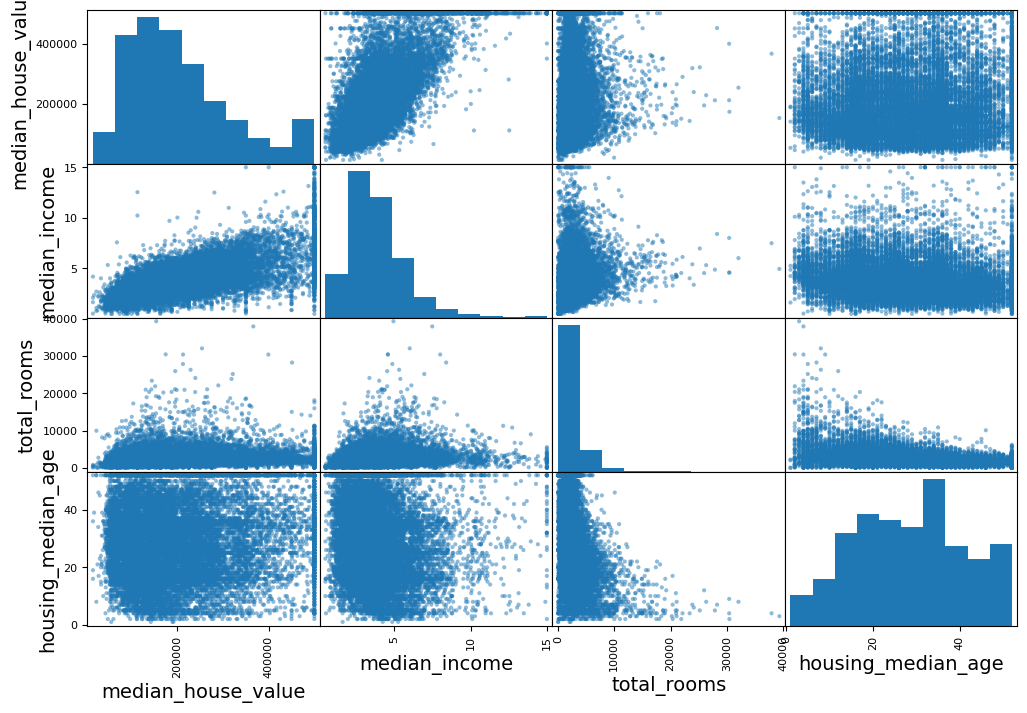

In [26]:
# Another way to look at correlation is to use Pandas scatter_matrix function
# which plots every numerical attribute against every other numerical attribute.
# Since there are many attributes, we select only a few that we think are most correlated.
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

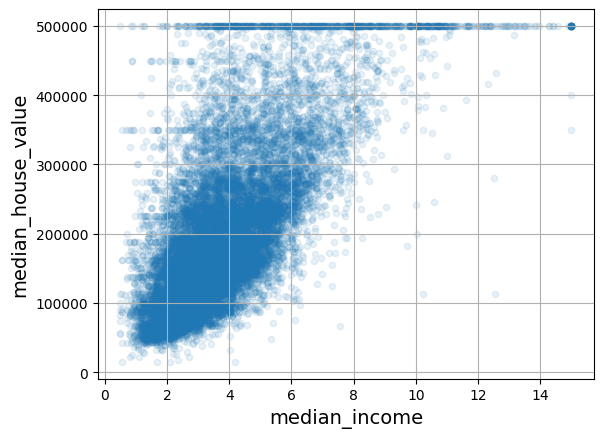

In [ ]:
# We see that the median income attribute seems to be the most correlated with
# median house value. Let's zoom in on their scatterplot.

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

# From this plot we can see that there is a clear positive correlation between
# median income and median house value. We can also notice that there are some
# outliers in the data, for example, there are some houses with a median value
# of more than $500,000 even though the median income is less than $15,000.
# These outliers could potentially skew our model, so we might want to consider
# removing them or using techniques to mitigate their impact.

### Attribute combination


In [28]:
# The total number of rooms and total number of bedrooms are not very useful
# if you don't know how many households are there. What we really want is the 
# number of rooms per household.
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

# We now want to compare the total number of bedrooms to the number of rooms
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

# Another attribute to look at could be the total people per house
housing["people_per_house"] = housing["population"] / housing["households"]

# Now we compute again the correlation matrix:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

### Prepare the data for Machine Learning Algorithms

In [ ]:
# Lets revert to a clean training set. We should also separate the labels from the features.
# note that the drop function returns a copy of the dataframe without the specified column

# Copy of the dataset without labels
housing = strat_train_set.drop("median_house_value", axis=1)

# Copy of the dataset with only labels
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
# CLEANING THE DATA
# Most machine learning algorithms cannot work with missing features so we need to
# take care of them. We noticed that the total_bedrooms attribute has some missing
# values. We have three options:
# 1. Get rid of the corresponding districts
# 2. Get rid of the whole attribute
# 3. Set the values to some value (zero, mean, median, etc.)

# We will use the third option because its the least destructive.
# We can easly do it using Pandas:

# option 1: get rid of the districts with missing values
# housing.dropna(subset=["total_bedrooms"], inplace=True)

# option 2: get rid of the whole attribute
# housing.drop("total_bedrooms", axis=1, inplace=True)

# option 3: set the values to the median
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

# We will use the third option because its the least destructive.
# But instead of doing it manually, we can use the SimpleImputer class from
# Scikit-Learn which provides various strategies for imputing missing values.
# The benefit is that the Imputer will store the median value of each attribute
# so you can use it later to impute missing values in the validation set, test set,
# and any new data fed to the model.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# We need to apply the imputer only to the numerical attributes
# This will be a copy of the dataset without the ocean_proximity
# attribute (the only non-numerical one).

housing_num = housing.select_dtypes(include=[np.number])

# Lets now fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

# Now the imputer has simply computed the median of each attribute and stored
# the result in its statistics_ instance variable. Only the total_bedrooms
# attribute had missing values, but we cannot be sure that there won't be missing
# values in new data after the system goes alive. So its safer to apply the imputer
# to all the numerical attributes.


# We can check the computed median values are correct by comparing them to the
# actual median values computed using Pandas:
print(imputer.statistics_)
print(housing_num.median().values)

# Now we can use the imputer to transform the training set by replacing
# missing values with the learned medians. This is done using the transform() method.
X = imputer.transform(housing_num)

# Missing values can be replaced using different strategies:
# strategy="mean": replace missing values using the mean value of the attribute
# strategy="median": replace missing values using the median value of the attribute
# strategy="most_frequent": replace missing values using the most frequent value of the attribute
# strategy="constant": replace missing values using a constant value (specified using the fill_value parameter)

# The last two strategies can also be used for non-numerical attributes.
# Other Imputer exist take a look at them (KNNImputer, IterativeImputer, ...)




[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.12500000e+03
  4.34000000e+02  1.16700000e+03  4.08000000e+02  3.53850000e+00
  1.79200000e+05  5.23557310e+00  2.03105786e-01  2.82231619e+00]
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.12500000e+03
  4.34000000e+02  1.16700000e+03  4.08000000e+02  3.53850000e+00
  1.79200000e+05  5.23557310e+00  2.03105786e-01  2.82231619e+00]
